In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
lookupFilepath="../speciespick/picked_assembly_summary_code.csv"
lookup_df=pd.read_csv(lookupFilepath)
lookup_df.head()

,asm_name,assembly_accession,domain,ftp_basename,ftp_path,organism_name,taxid,genetic_code
0,ASM2238v1,GCF_000022385.1,archaea,GCF_000022385.1_ASM2238v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Sulfolobus islandicus L.S.2.15,429572,11
1,ASM97008v1,GCF_000970085.1,archaea,GCF_000970085.1_ASM97008v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanosarcina siciliae T4/M,1434120,11
2,ASM734v1,GCF_000007345.1,archaea,GCF_000007345.1_ASM734v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanosarcina acetivorans C2A,188937,11
3,ASM35030v1,GCF_000350305.1,archaea,GCF_000350305.1_ASM35030v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Thermoplasmatales archaeon BRNA1,1054217,11
4,ASM96990v1,GCF_000969905.1,archaea,GCF_000969905.1_ASM96990v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanosarcina vacuolata Z-761,1434123,11


In [27]:
real_lst=[]
simu03_lst=[]
for key,row in lookup_df.iterrows():
    countDir="/home/mitsuki/out/altorf/genome/patternanalyze/count"
    countFilepath="{0}/{1}_{2}_{3}_count.csv".format(countDir,row["ftp_basename"],"chromosome","simu3")
    count_df=pd.read_csv(countFilepath,index_col=0)
    
    assert count_df["real"].sum()==count_df["simu"].sum()
    totalWindow=count_df["real"].sum()
    
    real_lst.append(np.dot(np.array(count_df["real"]),np.arange(7))/totalWindow)
    simu03_lst.append(np.dot(np.array(count_df["simu"]),np.arange(7))/totalWindow)

In [45]:
viz_df=pd.DataFrame()
viz_df["ftp_basename"]=lookup_df["ftp_basename"]
viz_df["real"]=real_lst
viz_df["simu03"]=simu03_lst
viz_df.head()

,ftp_basename,real,simu03
0,GCF_000022385.1_ASM2238v1,0.425893,0.427635
1,GCF_000970085.1_ASM97008v1,0.463257,0.442056
2,GCF_000007345.1_ASM734v1,0.448898,0.429019
3,GCF_000350305.1_ASM35030v1,1.094285,0.843878
4,GCF_000969905.1_ASM96990v1,0.410412,0.401882


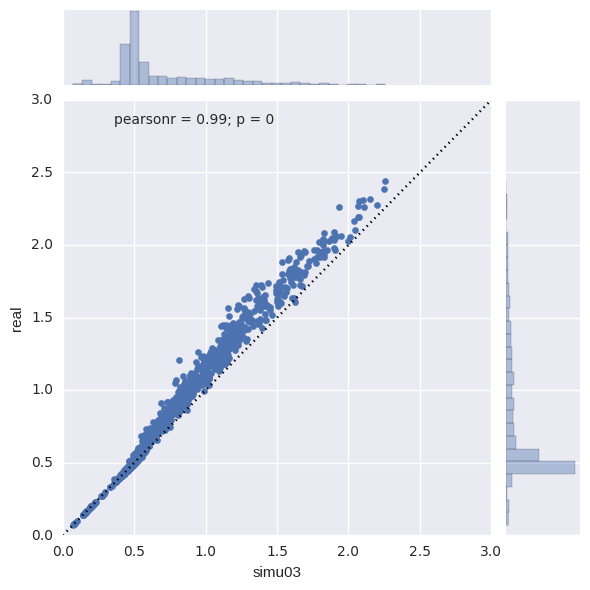

In [46]:
xClm="simu03"
yClm="real"
g=sns.jointplot(xClm, yClm, data=viz_df)
g.ax_joint.plot(range(7), ':k')
g.ax_joint.set_xlim([0,3])
g.ax_joint.set_ylim([0,3])
plt.show()